In [1]:
%run __init__.py
%load_ext autoreload
%autoreload 2

## Smart contract deployment

In [2]:
# TODO. We deploy smart contract that allows to transfer tokens between addresses
tx_hash = "0x993dc4110d30c51fcd3f16ad6a0efe4ce86aef01da992d107da292f603f82829"

# Step 1:

<div>
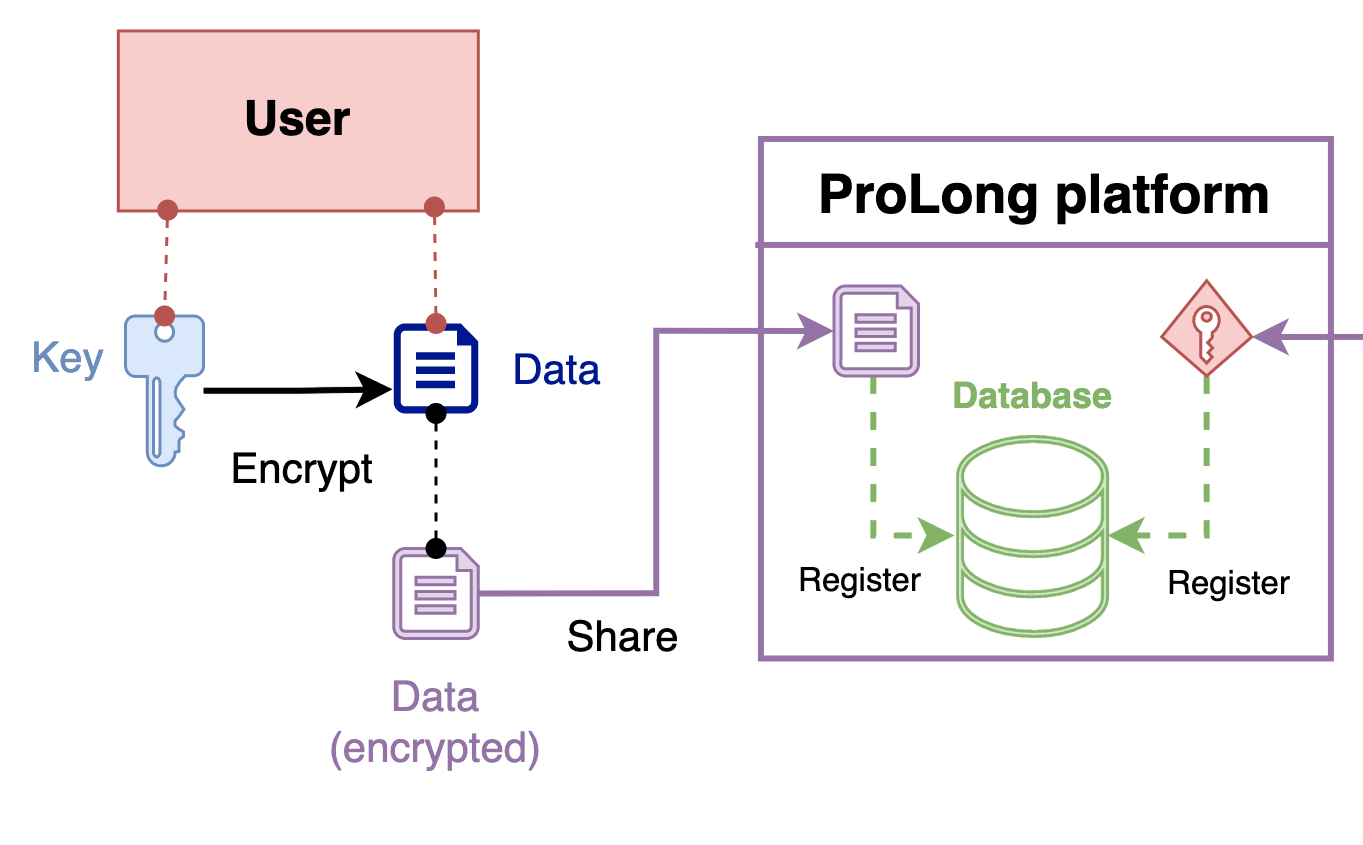
</div>

## User generates a key and encrypts his data

In [3]:
from source.cryptography import generate_key_and_iv

key, iv = generate_key_and_iv()

In [4]:
from source.cryptography import encrypt_data

path_to_file = "/Users/Konstantin/Desktop/BCEI/step_by_step_encrypt.drawio.png"

encrypted_data, encrypted_data_hash = encrypt_data(path_to_file, key, iv)

## User data

In [5]:
from source.io_utils import Storage

path_to_data_storage = "/Users/Konstantin/Desktop/BCEI/data"
short_description = 'step_by_step_encrypt.drawio'
price = 20

In [6]:
# TODO. Customer address should be taken from blockchain , e.g. via w3.eth.accounts[0]
user_address = "0x59c3BA7a0A4C26955037710654F60D368303B3E1"

In [7]:
# TODO. This looks deprecated
## User puts a reference to his data into the blockchain ?
# TODO. User address should be taken from blockchain , e.g. via w3.eth.accounts[0]
 # TODO. Put data into the contract here use tx_hash

## User uploads his data to the storage

In [8]:
storage = Storage(path_to_data_storage)

storage.add_file_to_storage(encrypted_data, encrypted_data_hash,
                            user_address)

In [9]:
storage.add_record(encrypted_data_hash, user_address, short_description, iv, price)

# Step 2:

<div>
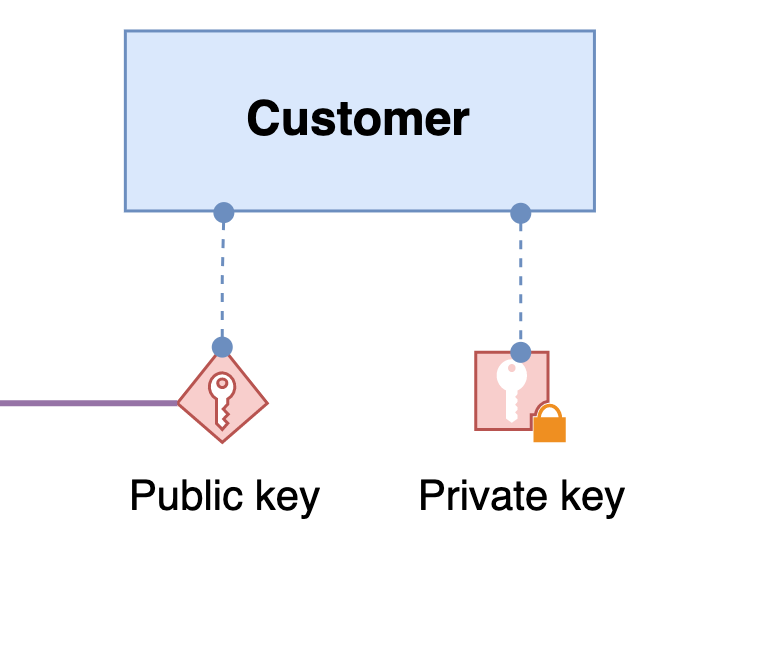
</div>

## Customer generates a public/private key pair

In [10]:
from source.cryptography import generate_public_and_private_keys

private_key, public_key = generate_public_and_private_keys()

## Customer registers on the platform

In [11]:
# TODO. Customer address should be taken from blockchain , e.g. via w3.eth.accounts[1]
customer_address = "0xB215bf4d09420f90292Ec6c995551599A9F1cc3B"

In [12]:
from source.cryptography import public_key2hex

storage.add_customer(customer_address, public_key2hex(public_key))

# Step 3:

<div>
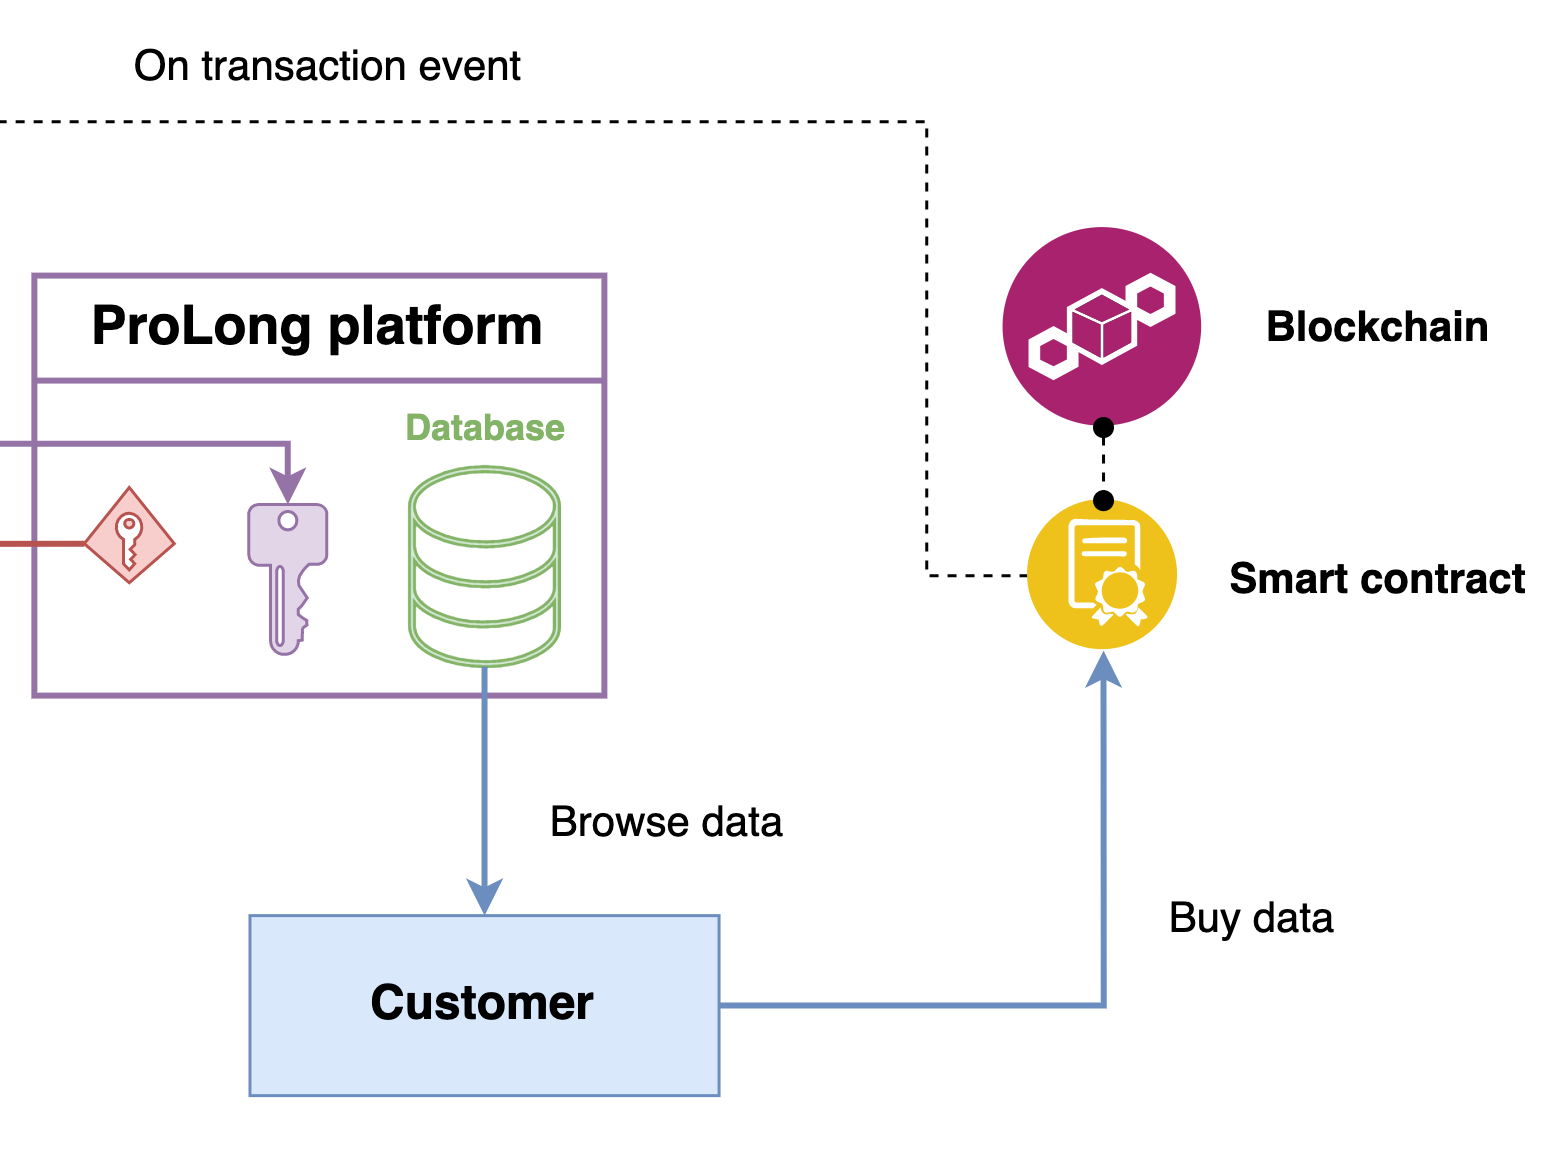
</div>

## Customer browses the list of available files

In [15]:
storage.registry_view()

,short_description,price
0,step_by_step_encrypt.drawio,20


In [16]:
record_idx = 0

## Customer purchases the files using blockchain

In [17]:
registry_record = storage.get_registry_record_by_idx(record_idx)
# TODO. approve(f(tx_hash), price)
# TODO. transferFrom(customer_address, user_address, price)

print(registry_record)

data_hash            62661f9a717469579ceeed82c0205165c6d9f5c421b653...
account_address             0x59c3BA7a0A4C26955037710654F60D368303B3E1
short_description                          step_by_step_encrypt.drawio
iv                                    17dcd1e27a0f7bed4cb132baad658a65
price                                                               20
Name: 0, dtype: object


# Step 4:

<div>
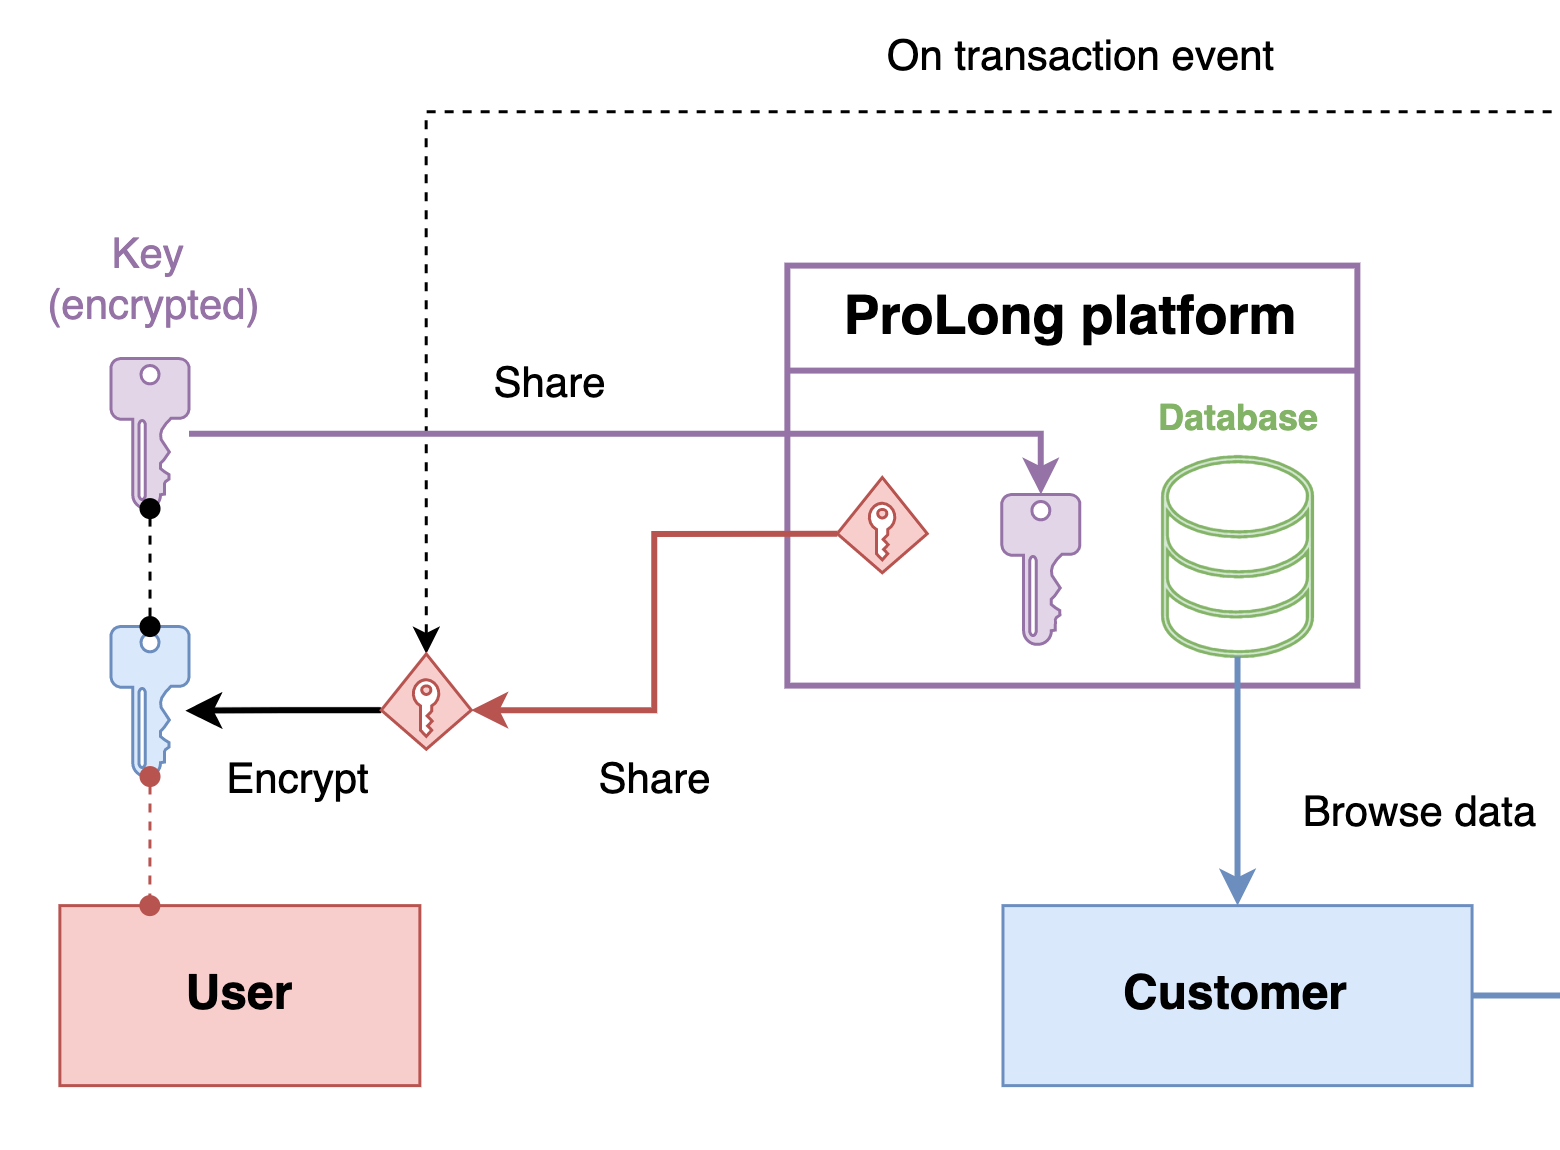
</div>

## User listens for the event that corresponds to the transaction

In [18]:
# Here. We check blockchain events for any pending transactions for data uploaded by the user.  
# TODO. Replace
user_records = storage.get_registry_records_by_user_address(user_address)

purchases = []
    
for index, row in user_records.iterrows():
    print(row)
    # Here. We check blockchain events for any pending transactions for data uploaded by the user.  
    # If any, we get: _customer_address
    _customer_address = '0xB215bf4d09420f90292Ec6c995551599A9F1cc3B'
    purchases.append((index, _customer_address))

data_hash            62661f9a717469579ceeed82c0205165c6d9f5c421b653...
account_address             0x59c3BA7a0A4C26955037710654F60D368303B3E1
short_description                          step_by_step_encrypt.drawio
iv                                    17dcd1e27a0f7bed4cb132baad658a65
price                                                               20
Name: 0, dtype: object


## User encrypts the key using public key and shares it

In [19]:
from source.cryptography import encrypt_data_via_public_key, hex2public_key

for (index, _customer_address) in purchases:
    _public_key = storage.get_public_key(_customer_address)
    
    encrypted_key = encrypt_data_via_public_key(hex2public_key(_public_key), key)
    
    storage.add_transaction(_customer_address, user_records.iloc[index].data_hash, encrypted_key)

# Step 5:

<div>
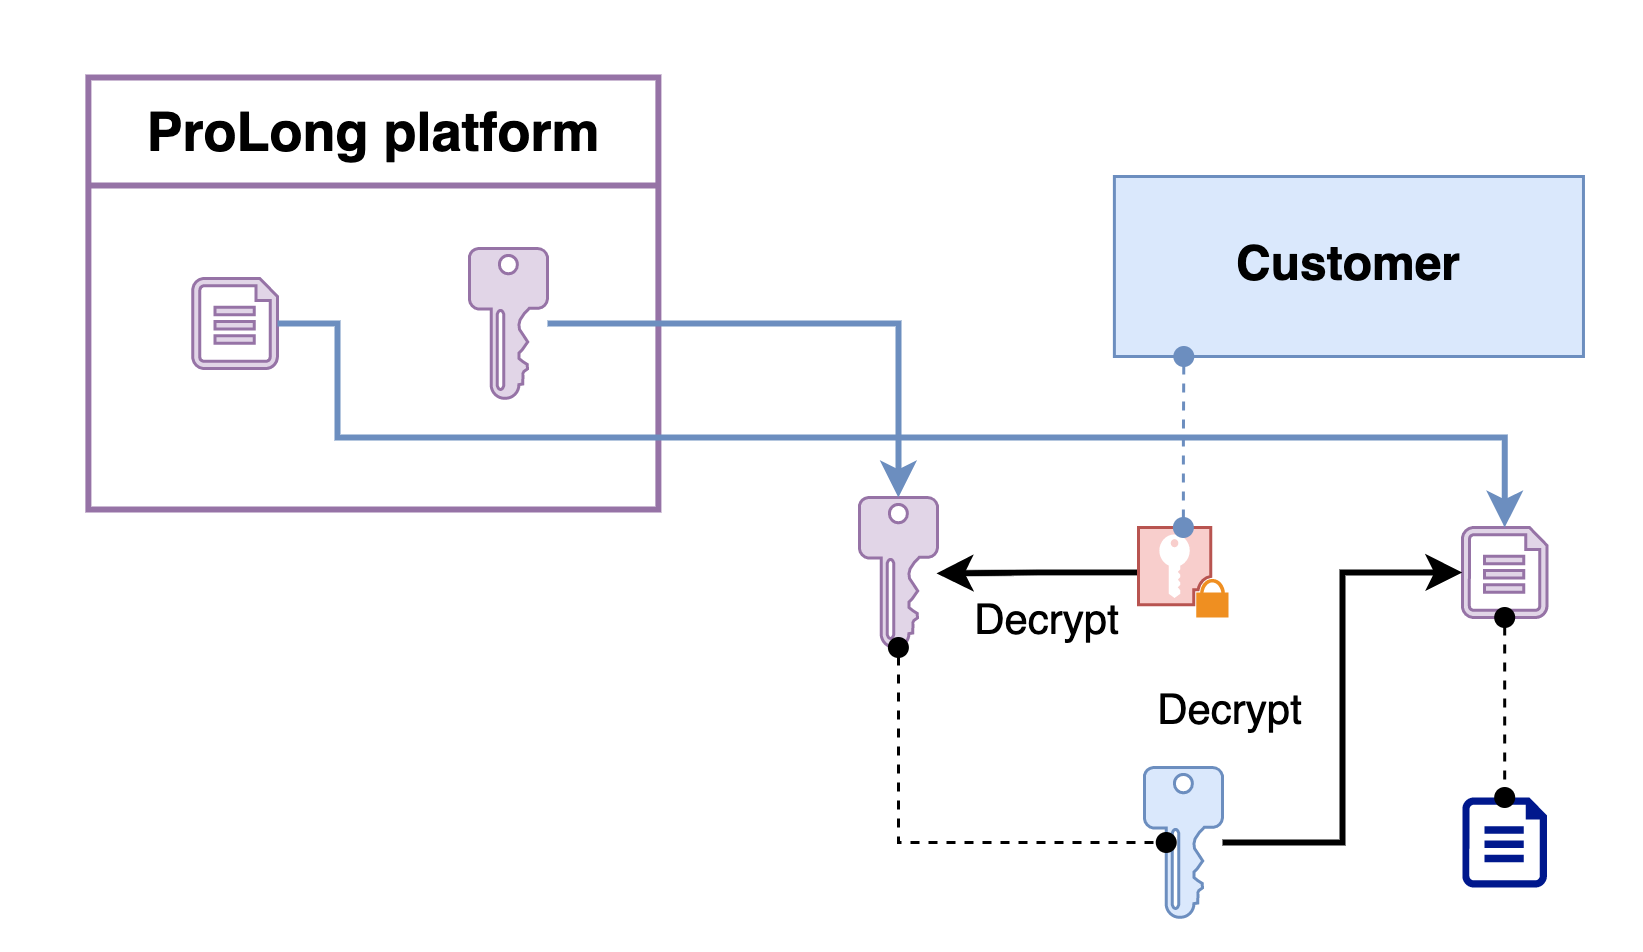
</div>

## Customer decrypts the key using private key

In [20]:
encrypted_key = storage.get_encrypted_key(customer_address, registry_record.data_hash)

In [21]:
from source.cryptography import decrypt_data_via_private_key

decrypted_key = decrypt_data_via_private_key(private_key, bytes.fromhex(encrypted_key))

## Customer decrypts the data usign the decrypted key

In [40]:
from source.cryptography import decrypt_data

decrypted_data = decrypt_data(storage.get_path_to_encrypted_file(registry_record.account_address, 
                                                                 registry_record.data_hash),
                              decrypted_key,
                              bytes.fromhex(registry_record.iv))

In [41]:
path_to_decrypted_data = "/Users/Konstantin/Desktop/BCEI/decrypted_step_by_step_encrypt.draw_io.png"

with open(path_to_decrypted_data, "wb") as file:
    file.write(decrypted_data)